In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [13]:
dataset = pd.read_csv('train_HP.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
def FillNaN_Corr_DF(df, col1, col2):
    mean_val = np.round(df[col1].mean(), 0)
    print(f'La media es: {mean_val}')
    median_val = np.round(df[col1].median(), 0)
    print(f'La mediana es: {median_val}')
    dfMeanImp = df[col1].fillna(mean_val)
    dfMeadianImp = df[col1].fillna(median_val)
    corr1 = np.corrcoef(dfMeanImp, df[col2])[0,1]
    corr2 = np.corrcoef(dfMeadianImp, df[col2])[0,1]
    print(corr1)
    print(corr2)
    if corr1 >= corr2:
        df[col1] = df[col1].fillna(mean_val)
    else:
        df[col1] = df[col1].fillna(median_val)
    print('Validacion Valores Nullos:')
    print(df[col1].isnull().sum())
    
FillNaN_Corr_DF(dataset, 'LotFrontage', 'SalePrice')

La media es: 70.0
La mediana es: 69.0
0.33489718326981494
0.33477085313975996
Validacion Valores Nullos:
0


In [15]:
def getContinuesCols(df):
    colnames = df.columns
    numeric_continues_vars = []
    for col in colnames:
        unique_values =len (df[col].unique())
        if((df[col].dtype != 'object') and (unique_values > 30)):
            numeric_continues_vars.append(col)
    return numeric_continues_vars

getContinuesCols(dataset)

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

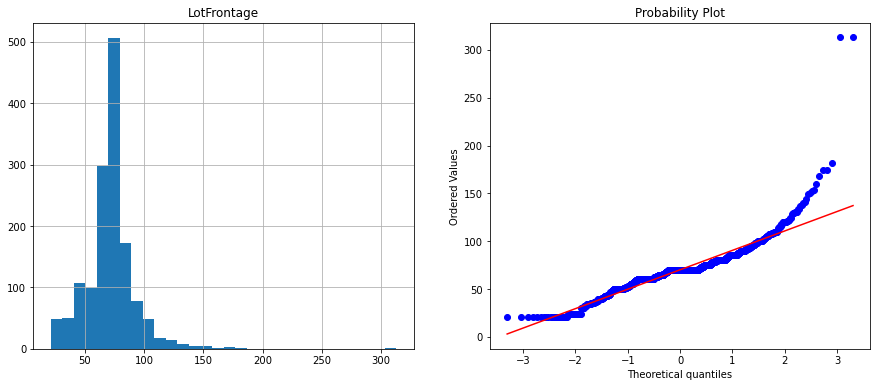

In [16]:
def plot_density_variable(df, col1):   
    plt.figure(figsize = (15,6))
    plt.subplot(121)
    df[col1].hist(bins=30)
    plt.title(col1)

    plt.subplot(122)
    stats.probplot(df[col1], dist="norm", plot=plt)
    plt.show()
    
plot_density_variable(dataset, 'LotFrontage')

In [28]:
def categorical_cols(df):
    colnames = df.columns
    categorical_vars = []
    for col in colnames:
        if(df[col].dtype == 'object'):
            categorical_vars.append(col)
    return categorical_vars

categorical_cols(dataset)


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [35]:
def executeFreqEncoding(df, map_type='freq'):
    colnames = df.columns
    for col in colnames:
        if(df[col].dtype == 'object'):
            factor_div = 1 if (map_type == 'freq') else len(df[col])
            mapper = (df[col].value_counts().sort_values(ascending=False)/factor_div).to_dict()
            df[col] = df[col].map(mapper)
    return (df)



In [36]:
dataenconding = dataset
executeFreqEncoding(dataenconding)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_log,LotFrontage_inv,LotFrontage_pol,LotFrontage_BC,LotFrontage_YJ
0,1,60,1151.0,65.0,8450,1454.0,NaN,925.0,1311.0,1459.0,...,2,2008,1267.0,1198.0,208500,4.174387,0.015385,4225.0,11.903070,11.648520
1,2,20,1151.0,80.0,9600,1454.0,NaN,925.0,1311.0,1459.0,...,5,2007,1267.0,1198.0,181500,4.382027,0.012500,6400.0,13.251739,12.925179
2,3,60,1151.0,68.0,11250,1454.0,NaN,484.0,1311.0,1459.0,...,9,2008,1267.0,1198.0,223500,4.219508,0.014706,4624.0,12.185815,11.916234
3,4,70,1151.0,60.0,9550,1454.0,NaN,484.0,1311.0,1459.0,...,2,2006,1267.0,101.0,140000,4.094345,0.016667,3600.0,11.415008,11.186341
4,5,60,1151.0,84.0,14260,1454.0,NaN,484.0,1311.0,1459.0,...,12,2008,1267.0,1198.0,250000,4.430817,0.011905,7056.0,13.586809,13.242217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1151.0,62.0,7917,1454.0,NaN,925.0,1311.0,1459.0,...,8,2007,1267.0,1198.0,175000,4.127134,0.016129,3844.0,11.612881,11.373729
1456,1457,20,1151.0,85.0,13175,1454.0,NaN,925.0,1311.0,1459.0,...,2,2010,1267.0,1198.0,210000,4.442651,0.011765,7225.0,13.669166,13.320133
1457,1458,70,1151.0,66.0,9042,1454.0,NaN,925.0,1311.0,1459.0,...,5,2010,1267.0,1198.0,266500,4.189655,0.015152,4356.0,11.998119,11.738520
1458,1459,20,1151.0,68.0,9717,1454.0,NaN,925.0,1311.0,1459.0,...,4,2010,1267.0,1198.0,142125,4.219508,0.014706,4624.0,12.185815,11.916234


In [18]:
def corr_transformaciones (df, variable, target):
    df[variable+'_log'] = np.log(df[variable])
    df[variable+'_inv'] = (1 / df[variable])
    df[variable+'_pol'] = (df[variable]**2)
    df[variable+'_BC'], lambdaX = stats.boxcox(df[variable])
    df[variable+'_YJ'], lambdaX = stats.yeojohnson(df[variable]) 
    comp_corr = df.iloc[:,80:].corr()
    return comp_corr

corr_transformaciones(dataset, "LotFrontage", 'SalePrice')

,SalePrice,LotFrontage_log,LotFrontage_inv,LotFrontage_pol,LotFrontage_BC,LotFrontage_YJ
SalePrice,1.000000,0.331495,-0.278517,0.247264,0.342379,0.342445
LotFrontage_log,0.331495,1.000000,-0.950426,0.697097,0.987656,0.987781
LotFrontage_inv,-0.278517,-0.950426,1.000000,-0.508345,-0.892894,-0.893145
LotFrontage_pol,0.247264,0.697097,-0.508345,1.000000,0.787779,0.787061
LotFrontage_BC,0.342379,0.987656,-0.892894,0.787779,1.000000,0.999999
LotFrontage_YJ,0.342445,0.987781,-0.893145,0.787061,0.999999,1.000000


C:\Users\velgo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


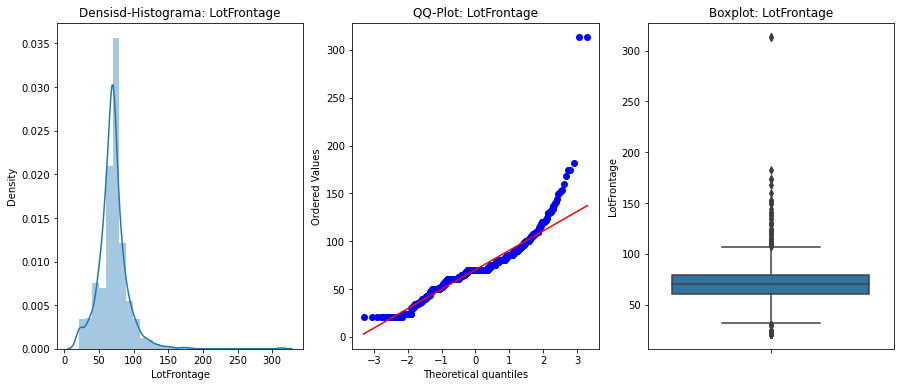

In [19]:
def inspect_outliers(df, col1):
    
    plt.figure(figsize = (15,6))
    
    plt.subplot(131)
    sns.distplot(df[col1], bins=30)
    plt.title("Densisd-Histograma: " + col1)
    
    plt.subplot(132)
    stats.probplot(df[col1], dist="norm", plot=plt)
    plt.title("QQ-Plot: " + col1)
    
    plt.subplot(133)
    sns.boxplot(y=df[col1])
    plt.title("Boxplot: " + col1)
    
    plt.show()

inspect_outliers(dataset, 'LotFrontage')

In [20]:
def detect_outliers(df, col1, factor):
    IQR = df[col1].quantile(0.75) - df[col1].quantile(0.25)
    LI = df[col1].quantile(0.25) - (IQR*factor)
    LS = df[col1].quantile(0.75) + (IQR*factor) 
    return LI, LS

detect_outliers(dataset, 'LotFrontage', 1.75)

(26.75, 112.25)

In [21]:
def outlier_treatment(df, col1, factor):
    IQR = df[col1].quantile(0.75) - df[col1].quantile(0.25)
    LI = df[col1].quantile(0.25) - (IQR*factor)
    LS = df[col1].quantile(0.75) + (IQR*factor)
    
    df[col1] = np.where(df[col1] > LS, LS, np.where(df[col1] < LI, LI, df[col1]))
    return(df)

outlier_treatment(dataset, 'LotFrontage', 1.75)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_log,LotFrontage_inv,LotFrontage_pol,LotFrontage_BC,LotFrontage_YJ
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,4.174387,0.015385,4225.0,11.903070,11.648520
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,4.382027,0.012500,6400.0,13.251739,12.925179
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,4.219508,0.014706,4624.0,12.185815,11.916234
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,4.094345,0.016667,3600.0,11.415008,11.186341
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,4.430817,0.011905,7056.0,13.586809,13.242217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,8,2007,WD,Normal,175000,4.127134,0.016129,3844.0,11.612881,11.373729
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,2,2010,WD,Normal,210000,4.442651,0.011765,7225.0,13.669166,13.320133
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,5,2010,WD,Normal,266500,4.189655,0.015152,4356.0,11.998119,11.738520
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,4,2010,WD,Normal,142125,4.219508,0.014706,4624.0,12.185815,11.916234


In [22]:
def FeatureScaling(df):
    dataset_temp = df.loc[:, getContinuesCols(df)]
    scaler = StandardScaler()
    scaler.fit(dataset_temp)
    StandardScaler()
    df_scaler = pd.DataFrame(scaler.transform(dataset_temp), columns=dataset_temp.columns)    
    return(df_scaler)

FeatureScaling(dataset)

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,LotFrontage_log,LotFrontage_inv,LotFrontage_pol,LotFrontage_BC,LotFrontage_YJ
0,-1.730865,-0.239206,-0.207142,1.050994,0.878668,0.510015,0.575425,-0.288653,-0.944591,-0.459303,...,-0.752176,0.216503,-0.359325,-0.270208,0.347273,-0.083752,-0.075314,-0.247223,-0.156138,-0.156007
1,-1.728492,0.597132,-0.091886,0.156734,-0.429577,-0.572835,1.171992,-0.288653,-0.641228,0.466465,...,1.626195,-0.704483,-0.359325,-0.270208,0.007288,0.563874,-0.520785,0.214140,0.536491,0.537106
2,-1.726120,-0.071938,0.073480,0.984752,0.830215,0.322174,0.092907,-0.288653,-0.301643,-0.313369,...,-0.752176,-0.070361,-0.359325,-0.270208,0.536154,0.056979,-0.180131,-0.162587,-0.010930,-0.010662
3,-1.723747,-0.517985,-0.096897,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,-0.061670,-0.687324,...,-0.752176,-0.176048,4.092524,-0.270208,-0.515281,-0.333405,0.122673,-0.379799,-0.406789,-0.406930
4,-1.721374,0.820156,0.375148,0.951632,0.733308,1.360826,0.463568,-0.288653,-0.174865,0.199680,...,0.780197,0.563760,-0.359325,-0.270208,0.869843,0.716051,-0.612708,0.353292,0.708572,0.709230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,-0.406474,-0.260560,0.918511,0.733308,-0.572835,-0.973018,-0.288653,0.873321,-0.238122,...,-0.752176,-0.100558,-0.359325,-0.270208,-0.074560,-0.231134,0.039646,-0.328041,-0.305169,-0.305195
1456,1.723747,0.875912,0.266407,0.222975,0.151865,0.084610,0.759659,0.722112,0.049262,1.104925,...,2.033231,-0.704483,-0.359325,-0.270208,0.366161,0.752962,-0.634337,0.389140,0.750867,0.751532
1457,1.726120,-0.183450,-0.147810,-1.002492,1.024029,-0.572835,-0.369871,-0.288653,0.701265,0.215641,...,-0.752176,0.201405,-0.359325,-0.270208,1.077611,-0.036133,-0.111312,-0.219435,-0.107324,-0.107145
1458,1.728492,-0.071938,-0.080160,-0.704406,0.539493,-0.572835,-0.865548,6.092188,-1.284176,0.046905,...,2.168910,-0.704483,1.473789,-0.270208,-0.488523,0.056979,-0.180131,-0.162587,-0.010930,-0.010662
